# Comparing HUG-SMC, THUG-SMC and RWM-SMC on BIP model

### Settings and Target

In [1]:
import numpy as np
from numpy import exp, log, zeros, eye
from numpy.linalg import norm
from numpy.random import uniform, randn, choice
from scipy.stats import norm as ndist
from warnings import catch_warnings, filterwarnings
from scipy.optimize import fsolve

from smc_thug import SMCTHUG, computational_cost
# from g_and_k_functions import fnorm, fnorm_broadcast, logprior
# from g_and_k_functions import data_generator, grad_fnorm, sample_prior
# from g_and_k_functions import log_epanechnikov_kernel, new_point

In [2]:
# # Settings for G and K model
# n_latents = 20
# seed = 1234
# theta0 = np.array([3.0, 1.0, 2.0, 0.5])
# n_params = len(theta0)
# d = n_latents + n_params

# # Generate Data
# y_star = data_generator(theta0, n_latents, seed)

### SMC-HUG

N = 5000
B = 5

smc_hug = SMCTHUG(
    N=N,
    d=d,
    ystar=y_star,
    logprior=logprior,
    ϵmin=0.2,
    pmin=0.2,
    pter=0.01,
    mcmc_iter=B,
    δ0=0.04,
    minstep=0.1/B,
    maxstep=1.0/B,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=200,
    B=B,
    maxMCMC=10,
    precondition=False
)

smc.sample_prior = lambda: sample_prior(n_params, n_latents)
smc.h = fnorm
smc.h_broadcast = fnorm_broadcast
smc.grad_h = lambda ξ: grad_fnorm(ξ, y_star)
smc.get_γ = lambda i: 0.0 #i**(-1/2)    # Set it to be constant.

out = smc.sample()

### THUG-SMC on Approximate Lifted Distribution (BIP)

Deterministic Function $F_L:\mathbb{R}^3\to\mathbb{R}$ 
$$
F_L(\xi) = F_L(\theta, \eta) = F(\theta) + \sigma\eta \qquad \sigma > 0
$$
where $F:\mathbb{R}^2\to\mathbb{R}$ is given by

In [3]:
# functions for approximate lifted BIP posterior 
from bip_functions import F, FL, logpriorL, log_epanechnikov_kernelL
from bip_functions import log_posteriorL, grad_FL, FL_broadcast, sample_priorL
from smc_thug import SMCTHUG

from numpy import errstate, log, ones, zeros
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [4]:
N = 5000
B = 5
σ = 1e-8
y_bip = 1
d_bip = 3

In [5]:
##### THUG!!
smc_bip_thug = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=1e-10,
    pmin=0.3,
    pter=0.01,
    mcmc_iter=B,
    δ0=0.04,
    minstep=0.001,
    maxstep=0.5,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=200,
    B=B,
    maxMCMC=10,
    precondition=False
)

smc_bip_thug.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_thug.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_thug.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_thug.sample_prior = sample_priorL
smc_bip_thug.get_γ = lambda i: i**(-1/20)  

out_bip_thug = smc_bip_thug.sample()

### Stopping Criterion: Minimum Tolerance 1e-10
### MCMC kernel: THUG.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 14.4830300000	 N unique starting: 3139
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8245
Stepsize used in next SMC iteration: 0.0520
Alpha used in next SMC iteration: 0.0059

### SMC step:  2
ϵ = 4.7652000000	 N unique starting: 3037
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8073
Stepsize used in next SMC iteration: 0.0670
Alpha used in next SMC iteration: 0.0036

### SMC step:  3
ϵ = 2.3641400000	 N unique starting: 3032
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7825
Stepsize used in next SMC iteration: 0.0853
Alpha used in next SMC iteration: 0.0023

### SMC step:  4
ϵ = 1.6477600000	 N unique starting: 2992
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7522
Stepsize used in next SMC iteration: 0.1069
Alpha used in next S

Average Acceptance Probability: 0.1606
Stepsize used in next SMC iteration: 0.1302
Alpha used in next SMC iteration: 0.0009

### SMC step:  39
ϵ = 0.0014900000	 N unique starting: 2792
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1544
Stepsize used in next SMC iteration: 0.1210
Alpha used in next SMC iteration: 0.0011

### SMC step:  40
ϵ = 0.0011900000	 N unique starting: 2755
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1594
Stepsize used in next SMC iteration: 0.1128
Alpha used in next SMC iteration: 0.0012

### SMC step:  41
ϵ = 0.0009600000	 N unique starting: 2825
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1527
Stepsize used in next SMC iteration: 0.1048
Alpha used in next SMC iteration: 0.0014

### SMC step:  42
ϵ = 0.0007700000	 N unique starting: 2767
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1540
Stepsize used in next SMC iteration: 0.0974
Alpha used in next SMC iteration: 0.0015

### SMC step:  

Average Acceptance Probability: 0.1217
Stepsize used in next SMC iteration: 0.0040
Alpha used in next SMC iteration: 0.2200

### SMC step:  78
ϵ = 0.0000000000	 N unique starting: 2459
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1223
Stepsize used in next SMC iteration: 0.0036
Alpha used in next SMC iteration: 0.2455

### SMC step:  79
ϵ = 0.0000000000	 N unique starting: 2476
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1272
Stepsize used in next SMC iteration: 0.0033
Alpha used in next SMC iteration: 0.2721

### SMC step:  80
ϵ = 0.0000000000	 N unique starting: 2475
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1253
Stepsize used in next SMC iteration: 0.0031
Alpha used in next SMC iteration: 0.3008

### SMC step:  81
ϵ = 0.0000000000	 N unique starting: 2499
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1220
Stepsize used in next SMC iteration: 0.0028
Alpha used in next SMC iteration: 0.3317

### SMC step:  

Average Acceptance Probability: 0.0820
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.9853

### SMC step:  117
ϵ = 0.0000000000	 N unique starting: 2194
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0851
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.9875

### SMC step:  118
ϵ = 0.0000000000	 N unique starting: 2222
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0823
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.9895

### SMC step:  119
ϵ = 0.0000000000	 N unique starting: 2249
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0997
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.9910
Latest ϵ == ϵmin. Breaking


### HUG-SMC on Approximate Lifted Distribution

In [6]:
##### HUG!!
smc_bip_hug = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=1e-10,
    pmin=0.3,
    pter=0.01,
    mcmc_iter=B,
    δ0=0.04,
    minstep=0.001,
    maxstep=0.5,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=200,
    B=B,
    maxMCMC=10,
    precondition=False,
    thug=True,
    force_hug=True
)
smc_bip_hug.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_hug.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_hug.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_hug.sample_prior = sample_priorL
#smc_bip_hug.get_γ = lambda i: 0.0      ############################################ Set it to be constant for HUG!

out_bip_hug = smc_bip_hug.sample()

### Stopping Criterion: Minimum Tolerance 1e-10
### MCMC kernel: HUG.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 13.3792300000	 N unique starting: 3146
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8260
Stepsize used in next SMC iteration: 0.0520
Alpha used in next SMC iteration: 0.0000

### SMC step:  2
ϵ = 4.3922000000	 N unique starting: 3069
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8088
Stepsize used in next SMC iteration: 0.0671
Alpha used in next SMC iteration: 0.0000

### SMC step:  3
ϵ = 2.1662900000	 N unique starting: 3048
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7826
Stepsize used in next SMC iteration: 0.0854
Alpha used in next SMC iteration: 0.0000

### SMC step:  4
ϵ = 1.5986900000	 N unique starting: 3004
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7510
Stepsize used in next SMC iteration: 0.1070
Alpha used in next SM

Average Acceptance Probability: 0.1672
Stepsize used in next SMC iteration: 0.1229
Alpha used in next SMC iteration: 0.0000

### SMC step:  39
ϵ = 0.0012700000	 N unique starting: 2839
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1606
Stepsize used in next SMC iteration: 0.1146
Alpha used in next SMC iteration: 0.0000

### SMC step:  40
ϵ = 0.0010100000	 N unique starting: 2746
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1541
Stepsize used in next SMC iteration: 0.1065
Alpha used in next SMC iteration: 0.0000

### SMC step:  41
ϵ = 0.0008100000	 N unique starting: 2755
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1497
Stepsize used in next SMC iteration: 0.0988
Alpha used in next SMC iteration: 0.0000

### SMC step:  42
ϵ = 0.0006400000	 N unique starting: 2747
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1431
Stepsize used in next SMC iteration: 0.0914
Alpha used in next SMC iteration: 0.0000

### SMC step:  

Average Acceptance Probability: 0.1269
Stepsize used in next SMC iteration: 0.0038
Alpha used in next SMC iteration: 0.0000

### SMC step:  78
ϵ = 0.0000000000	 N unique starting: 2495
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1255
Stepsize used in next SMC iteration: 0.0035
Alpha used in next SMC iteration: 0.0000

### SMC step:  79
ϵ = 0.0000000000	 N unique starting: 2467
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1262
Stepsize used in next SMC iteration: 0.0032
Alpha used in next SMC iteration: 0.0000

### SMC step:  80
ϵ = 0.0000000000	 N unique starting: 2450
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1275
Stepsize used in next SMC iteration: 0.0029
Alpha used in next SMC iteration: 0.0000

### SMC step:  81
ϵ = 0.0000000000	 N unique starting: 2461
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1222
Stepsize used in next SMC iteration: 0.0027
Alpha used in next SMC iteration: 0.0000

### SMC step:  

Average Acceptance Probability: 0.0164
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.0000

### SMC step:  117
ϵ = 0.0000000000	 N unique starting: 986
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0152
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.0000

### SMC step:  118
ϵ = 0.0000000000	 N unique starting: 914
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0154
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.0000

### SMC step:  119
ϵ = 0.0000000000	 N unique starting: 890
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0124
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.0000

### SMC step:  120
ϵ = 0.0000000000	 N unique starting: 848
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0123
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.0000

### SMC step:  

### RWM on Approximate Lifted Distribution (BIP)

Suppose for Hug/Thug we start with $\delta_0$ and adapt the step size within the range $\delta_{H}\in[\delta_{\min}, \delta_{\max}]$. This means for each particle, and for each MCMC iteration we do $B$ steps, each with stepsize $\delta$. In a way the full step size is $\delta B$.

Perhaps the best way to compare this with RWM is to use a step size within the range $\delta_{R}\in[\delta_{\min}B, \delta_{\max}B]$

In [7]:
smc_bip_rwm = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=1e-10,
    pmin=0.3,
    pter=0.01,
    mcmc_iter=B,
    δ0=0.04,
    minstep=0.00001,
    maxstep=0.5,
    manual_initialization=False,
    iterscheme='adaptive',
    maxiter=200,
    B=B,
    maxMCMC=10,
    precondition=True,
    thug=False
)

smc_bip_rwm.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_rwm.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_rwm.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_rwm.sample_prior = sample_priorL
#smc_bip_rwm.get_γ = lambda i: i**(-1/20)    # Set it to be constant.

out_bip_rwm = smc_bip_rwm.sample()

### Stopping Criterion: Minimum Tolerance 1e-10
### MCMC kernel: RWM with Preconditioning.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 14.1074100000	 N unique starting: 3152
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3686
Stepsize used in next SMC iteration: 0.0414
Alpha used in next SMC iteration: 0.0000

### SMC step:  2
ϵ = 3.3371100000	 N unique starting: 3002
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.3747
Stepsize used in next SMC iteration: 0.0430
Alpha used in next SMC iteration: 0.0000

### SMC step:  3
ϵ = 1.6220600000	 N unique starting: 3064
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.3296
Stepsize used in next SMC iteration: 0.0436
Alpha used in next SMC iteration: 0.0000

### SMC step:  4
ϵ = 1.2118000000	 N unique starting: 3035
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.2498
Stepsize used in next SMC iteration: 0.04

Average Acceptance Probability: 0.0006
Stepsize used in next SMC iteration: 0.0004
Alpha used in next SMC iteration: 0.0000

### SMC step:  39
ϵ = 0.0040300000	 N unique starting: 309
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.0005
Stepsize used in next SMC iteration: 0.0003
Alpha used in next SMC iteration: 0.0000

### SMC step:  40
ϵ = 0.0037000000	 N unique starting: 275
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.0005
Stepsize used in next SMC iteration: 0.0003
Alpha used in next SMC iteration: 0.0000

### SMC step:  41
ϵ = 0.0033500000	 N unique starting: 253
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.0004
Stepsize used in next SMC iteration: 0.0002
Alpha used in next SMC iteration: 0.0000

### SMC step:  42
ϵ = 0.0030400000	 N unique starting: 222
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.0003
Stepsize used in next SMC iteration: 0.0002
Alpha used in next SMC iteration: 0.0000

### SMC step:  

/Users/maurocamara/Documents/University/ManifoldSampling/smc_thug.py:177: RuntimeWarning: divide by zero encountered in double_scalars
  def adaptive_n_mcmc(self): return min(self.maxMCMC, int(ceil(log(1 - self.pPmoved) / log(1 - self.accprob[-1]))))


OverflowError: cannot convert float infinity to integer

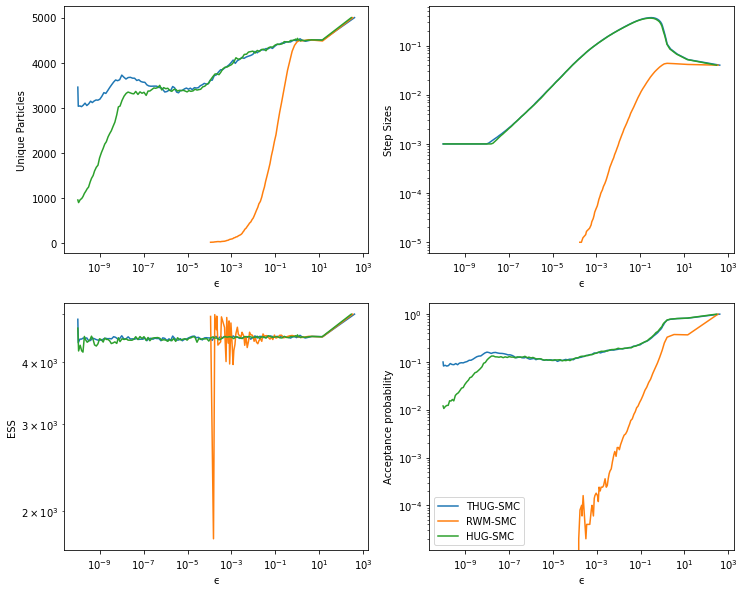

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Unique Particles
ax[0, 0].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['UNIQUE_PARTICLES']))), label='THUG-SMC')
ax[0, 0].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.n_unique_particles))), label='RWM-SMC')
ax[0, 0].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['UNIQUE_PARTICLES']))), label='HUG-SMC')
ax[0, 0].set_xlabel("ϵ")
ax[0, 0].set_ylabel("Unique Particles")
ax[0, 0].set_xscale('log')

# Step Sizes
ax[0, 1].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['STEP_SIZES']))), label='THUG-SMC')
ax[0, 1].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.step_sizes[:-1]))), label='RWM-SMC')
ax[0, 1].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['STEP_SIZES']))), label='HUG-SMC')
ax[0, 1].set_xlabel("ϵ")
ax[0, 1].set_ylabel("Step Sizes")
ax[0, 1].set_xscale('log')
ax[0, 1].set_yscale('log')

# ESS
ax[1, 0].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['ESS']))), label='THUG-SMC')
ax[1, 0].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.ESS))), label='RWM-SMC')
ax[1, 0].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['ESS']))), label='HUG-SMC')
ax[1, 0].set_xlabel("ϵ")
ax[1, 0].set_ylabel("ESS")
ax[1, 0].set_xscale('log')
ax[1, 0].set_yscale('log')

# Acceptance Probability
ax[1, 1].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['AP']))), label='THUG-SMC')
ax[1, 1].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.accprob))), label='RWM-SMC')
ax[1, 1].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['AP']))), label='HUG-SMC')
ax[1, 1].set_xlabel("ϵ")
ax[1, 1].set_ylabel("Acceptance probability")
ax[1, 1].set_xscale('log')
ax[1, 1].set_yscale('log')

plt.legend()
plt.show()

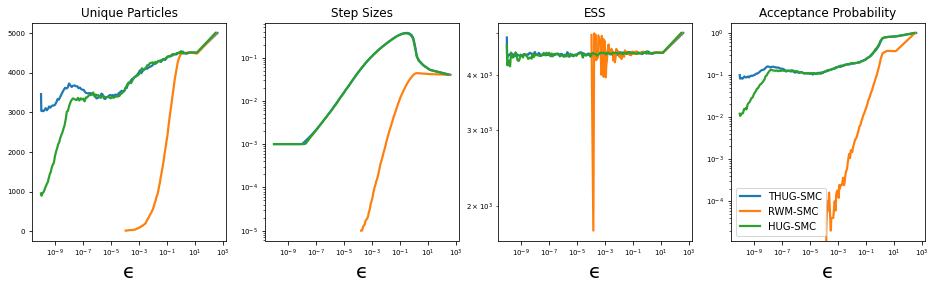

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
lw = 2.2

# Unique Particles
ax[0].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['UNIQUE_PARTICLES']))), label='THUG-SMC', lw=lw)
ax[0].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.n_unique_particles))), label='RWM-SMC', lw=lw)
ax[0].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['UNIQUE_PARTICLES']))), label='HUG-SMC', lw=lw)
ax[0].set_xlabel("ϵ", fontsize=20)
#ax[0].set_ylabel("Unique Particles")
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=7)
ax[0].set_title("Unique Particles")

# Step Sizes
ax[1].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['STEP_SIZES']))), label='THUG-SMC', lw=lw)
ax[1].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.step_sizes[:-1]))), label='RWM-SMC', lw=lw)
ax[1].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['STEP_SIZES']))), label='HUG-SMC', lw=lw)
ax[1].set_xlabel("ϵ", fontsize=20)
#ax[1].set_ylabel("Step Sizes")
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].tick_params(axis='both', which='both', labelsize=7)
ax[1].set_title("Step Sizes")

# ESS
ax[2].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['ESS']))), label='THUG-SMC', lw=lw)
ax[2].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.ESS))), label='RWM-SMC', lw=lw)
ax[2].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['ESS']))), label='HUG-SMC', lw=lw)
ax[2].set_xlabel("ϵ", fontsize=20)
#ax[2].set_ylabel("ESS")
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].tick_params(axis='both', which='both', labelsize=7)
ax[2].set_title("ESS")

# Acceptance Probability
ax[3].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['AP']))), label='THUG-SMC', lw=lw)
ax[3].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.accprob))), label='RWM-SMC', lw=lw)
ax[3].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['AP']))), label='HUG-SMC', lw=lw)
ax[3].set_xlabel("ϵ", fontsize=20)
#ax[3].set_ylabel("Acceptance probability")
ax[3].set_xscale('log')
ax[3].set_yscale('log')
ax[3].tick_params(axis='both', which='both', labelsize=7)
ax[3].set_title("Acceptance Probability")

plt.legend()
plt.savefig("figures/smc_thug.png", dpi=300)
plt.show()

In [35]:
def update_α(α, a_hat, i, a_star):
    """Updates α based on current acceptance probability"""
    τ = log(α / (1 - α))
    γ = i**(-1/20)  
    τ = τ - γ*(a_hat - a_star)
    α = np.clip(1 / (1 + exp(-τ)), 0.0, 0.999)
    return α

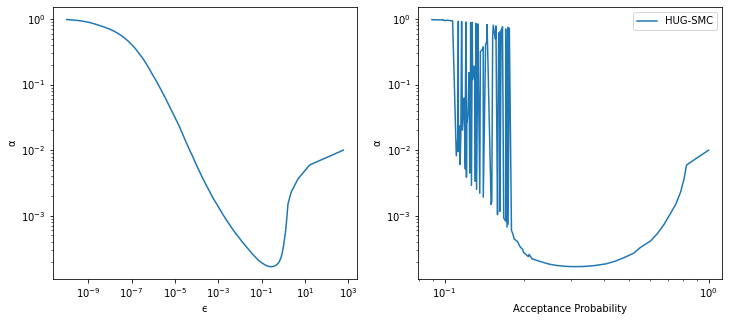

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax[0].plot(*zip(*sorted(zip(out_bip['EPSILON'], out_bip['ALPHAS']))), label='HUG-SMC')
ax[0].set_xlabel("ϵ")
ax[0].set_ylabel("α")
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].plot(*zip(*sorted(zip(out_bip['AP'], out_bip['ALPHAS']))), label='HUG-SMC')
ax[1].set_xlabel("Acceptance Probability")
ax[1].set_ylabel("α")
ax[1].set_xscale('log')
ax[1].set_yscale('log')
plt.legend()
plt.show()

In [32]:
import symnum.numpy as snp
from symnum import (
    numpify, named_array, jacobian, grad, 
    vector_jacobian_product, matrix_hessian_product)
import sympy
import numpy as np

dim_θ = 2
dim_y = 1

@numpify(dim_θ)
def forward_func(θ):
    return snp.array([θ[1]**2 + 3 * θ[0]**2 * (θ[0]**2 - 1)])

def create_fig_if_none(ax, **fig_kw):
    if ax is None:
        fig, ax = plt.subplots(**fig_kw)
    else:
        fig = ax.figure
    return fig, ax

def split_into_integer_parts(n, m):
    return [round(n / m)] * (m - 1) + [n - round(n / m) * (m - 1)]

def grid_on_interval(interval, n_points, cosine_spacing=False):
    if cosine_spacing:
        # Use non-linear spacing with higher density near endpoints
        ts =  ((1 + np.cos(np.linspace(0, 1, n_points) * np.pi)) / 2)
    else:
        ts = np.linspace(0, 1, n_points)
    # If open interval space over range [left + eps, right - eps]
    eps = 10 * np.finfo(np.float64).eps
    left = (float(interval.left) + eps if interval.left_open 
            else float(interval.left))
    right = (float(interval.right) - eps if interval.right_open 
             else float(interval.right))
    return left + ts * (right - left)



def solve_for_limiting_manifold(y, n_points=200, cosine_spacing=False):
    assert n_points % 2 == 0, 'n_points must be even'
    θ = named_array('θ', 2)
    # solve F(θ) = y for θ[1] in terms of θ[0]
    θ_1_gvn_θ_0 = sympy.solve(forward_func(θ)[0] - y, θ[1])
    # find interval(s) over which θ[0] gives real θ[1] solutions
    θ_0_range = sympy.solveset(
        θ_1_gvn_θ_0[0]**2 > 0, θ[0], domain=sympy.Reals)
    θ_0_intervals = (
        θ_0_range.args if isinstance(θ_0_range, sympy.Union) 
        else [θ_0_range])
    # create  grid of values over valid θ[0] interval(s)
    n_intervals = len(θ_0_intervals)
    θ_0_grids = [
        grid_on_interval(intvl, n_pt + 1, cosine_spacing)
        for intvl, n_pt in zip(
            θ_0_intervals, 
            split_into_integer_parts(n_points // 2, n_intervals))]
    # generate NumPy function to calculate θ[1] in terms of θ[0]
    solve_func = sympy.lambdify(θ[0], θ_1_gvn_θ_0)
    manifold_points = []
    for θ_0_grid in θ_0_grids:
        # numerically calculate +/- θ[1] solutions over θ[0] grid
        θ_1_grid_neg, θ_1_grid_pos = solve_func(θ_0_grid)
        # stack θ[0] and θ[1] values in to 2D array in anticlockwise order
        manifold_points.append(np.stack([
            np.concatenate([θ_0_grid, θ_0_grid[-2:0:-1]]),
            np.concatenate([θ_1_grid_neg, θ_1_grid_pos[-2:0:-1]])
        ], -1))
    return manifold_points

def plot_limiting_manifold(y, ax=None, num_points=200):
    manifold_points = solve_for_limiting_manifold(
        y, num_points, cosine_spacing=True)
    fig, ax = create_fig_if_none(ax)
    # repeat first point to close loop by duplicating index
    for component in manifold_points:
        indices = np.arange(component.shape[0] + 1) % component.shape[0]
        line, = ax.plot(component[indices, 0], 
                        component[indices, 1], '-', color='C1', lw=1.)
    return fig, ax, line

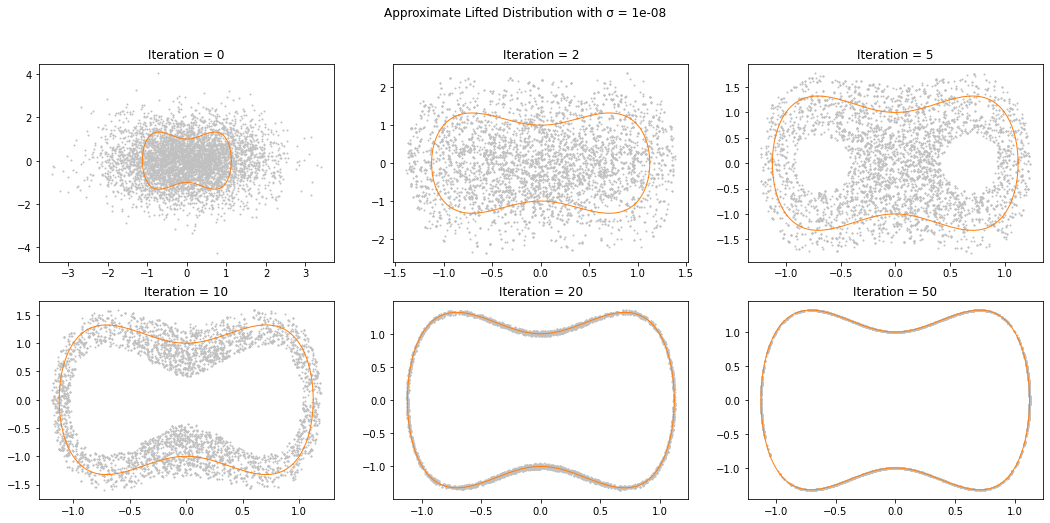

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
fig.suptitle("Approximate Lifted Distribution with σ = {}".format(σ))
### ROW 1
ax[0, 0].scatter(*out_bip['P'][:, :2, 0].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[0, 0])
ax[0, 0].set_title("Iteration = 0")

iter1 = 2
ax[0, 1].scatter(*out_bip['P'][out_bip['A'][:, iter1], :2, iter1].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[0, 1])
ax[0, 1].set_title("Iteration = {}".format(iter1))

iter2 = 5
ax[0, 2].scatter(*out_bip['P'][out_bip['A'][:, iter2], :2, iter2].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[0, 2])
ax[0, 2].set_title("Iteration = {}".format(iter2))

### ROW 2
iter3 = 10
ax[1, 0].scatter(*out_bip['P'][out_bip['A'][:, iter3], :2, iter3].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[1, 0])
ax[1, 0].set_title("Iteration = {}".format(iter3))

iter4 = 20
ax[1, 1].scatter(*out_bip['P'][out_bip['A'][:, iter4], :2, iter4].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[1, 1])
ax[1, 1].set_title("Iteration = {}".format(iter4))

iter5 = 50
ax[1, 2].scatter(*out_bip['P'][out_bip['A'][:, iter5], :2, iter5].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[1, 2])
ax[1, 2].set_title("Iteration = {}".format(iter5))
plt.show()

# RWM on Approximate Lifted Distribution (BIP)

Suppose for Hug/Thug we start with $\delta_0$ and adapt the step size within the range $\delta_{H}\in[\delta_{\min}, \delta_{\max}]$. This means for each particle, and for each MCMC iteration we do $B$ steps, each with stepsize $\delta$. In a way the full step size is $\delta B$.

Perhaps the best way to compare this with RWM is to use a step size within the range $\delta_{R}\in[\delta_{\min}B, \delta_{\max}B]$

In [10]:
smc_bip_rwm = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=1e-10,
    pmin=0.3,
    pter=0.01,
    mcmc_iter=B,
    δ0=0.04,
    minstep=0.00001,
    maxstep=0.5,
    manual_initialization=False,
    iterscheme='adaptive',
    maxiter=200,
    B=B,
    maxMCMC=10,
    precondition=True,
    thug=False
)

### Stopping Criterion: Minimum Tolerance 1e-10
### MCMC kernel: RWM with Preconditioning.


In [11]:
smc_bip_rwm.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_rwm.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_rwm.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_rwm.sample_prior = sample_priorL
smc_bip_rwm.get_γ = lambda i: i**(-1/20)    # Set it to be constant.

In [12]:
out_bip_rwm = smc_bip_rwm.sample()

### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 13.0793100000	 N unique starting: 3213
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3626
Stepsize used in next SMC iteration: 0.0413
Alpha used in next SMC iteration: 0.0094

### SMC step:  2
ϵ = 3.5283400000	 N unique starting: 3047
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.3704
Stepsize used in next SMC iteration: 0.0428
Alpha used in next SMC iteration: 0.0088

### SMC step:  3
ϵ = 1.6390700000	 N unique starting: 3036
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.3365
Stepsize used in next SMC iteration: 0.0435
Alpha used in next SMC iteration: 0.0085

### SMC step:  4
ϵ = 1.2197200000	 N unique starting: 3036
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.2552
Stepsize used in next SMC iteration: 0.0426
Alpha used in next SMC iteration: 0.0088

### SMC step:  5
ϵ = 0.9801000000	 N unique st

Average Acceptance Probability: 0.0005
Stepsize used in next SMC iteration: 0.0003
Alpha used in next SMC iteration: 0.9736

### SMC step:  40
ϵ = 0.0038900000	 N unique starting: 275
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.0009
Stepsize used in next SMC iteration: 0.0003
Alpha used in next SMC iteration: 0.9793

### SMC step:  41
ϵ = 0.0033400000	 N unique starting: 258
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.0006
Stepsize used in next SMC iteration: 0.0002
Alpha used in next SMC iteration: 0.9838

### SMC step:  42
ϵ = 0.0029700000	 N unique starting: 238
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.0004
Stepsize used in next SMC iteration: 0.0002
Alpha used in next SMC iteration: 0.9873

### SMC step:  43
ϵ = 0.0026400000	 N unique starting: 221
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.0005
Stepsize used in next SMC iteration: 0.0002
Alpha used in next SMC iteration: 0.9900

### SMC step:  

/Users/maurocamara/Documents/University/ManifoldSampling/smc_thug.py:155: RuntimeWarning: divide by zero encountered in double_scalars
  def adaptive_n_mcmc(self): return min(self.maxMCMC, int(ceil(log(1 - self.pPmoved) / log(1 - self.accprob[-1]))))


OverflowError: cannot convert float infinity to integer

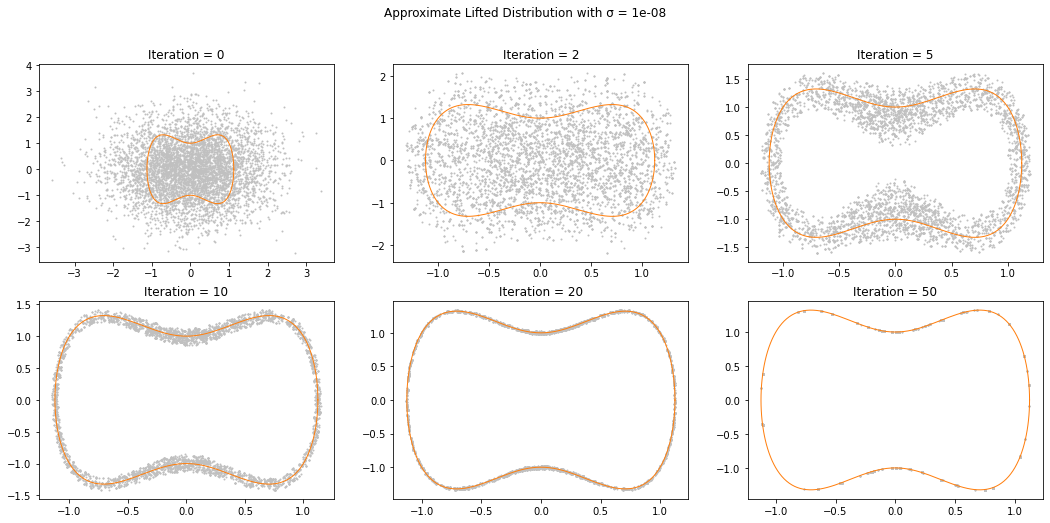

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
fig.suptitle("Approximate Lifted Distribution with σ = {}".format(σ))
### ROW 1
ax[0, 0].scatter(*smc_bip_rwm.P[:, :2, 0].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[0, 0])
ax[0, 0].set_title("Iteration = 0")

iter1 = 2
ax[0, 1].scatter(*smc_bip_rwm.P[smc_bip_rwm.A[:, iter1], :2, iter1].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[0, 1])
ax[0, 1].set_title("Iteration = {}".format(iter1))

iter2 = 5
ax[0, 2].scatter(*smc_bip_rwm.P[smc_bip_rwm.A[:, iter2], :2, iter2].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[0, 2])
ax[0, 2].set_title("Iteration = {}".format(iter2))

### ROW 2
iter3 = 10
ax[1, 0].scatter(*smc_bip_rwm.P[smc_bip_rwm.A[:, iter3], :2, iter3].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[1, 0])
ax[1, 0].set_title("Iteration = {}".format(iter3))

iter4 = 20
ax[1, 1].scatter(*smc_bip_rwm.P[smc_bip_rwm.A[:, iter4], :2, iter4].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[1, 1])
ax[1, 1].set_title("Iteration = {}".format(iter4))

iter5 = 50
ax[1, 2].scatter(*smc_bip_rwm.P[smc_bip_rwm.A[:, iter5], :2, iter5].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[1, 2])
ax[1, 2].set_title("Iteration = {}".format(iter5))
plt.show()